In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from model.WGAN import WGAN ## not readymade module 
from utils.loaders import load_cifar ## not readymade module

In [2]:
SECTION = 'gan'
RUN_ID = '002'
DATA_NAME = 'horses'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))
    
mode = 'build'

In [3]:
if DATA_NAME == 'cars':
    label = 1 
elif DATA_NAME == 'horses':
    label = 7 
(x_train, y_train) = load_cifar(label, 10)

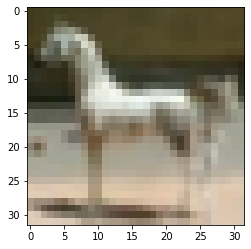

In [4]:
plt.imshow(x_train[150, :,:,:]* 0.5+1*0.5)

In [5]:
if mode == 'build':
    gan = WGAN()
    
    #gan.save(RUN_FOLDER)
    
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [6]:
gan.critic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 32)        2432      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16, 16, 32)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 4, 4, 128)         0     

In [7]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              206848    
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 8, 8, 128)         4097

In [8]:
gan.model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_input (InputLayer)     [(None, 100)]             0         
_________________________________________________________________
model_1 (Model)              (None, 32, 32, 3)         884163    
_________________________________________________________________
model (Model)                (None, 1)                 670401    
Total params: 1,554,564
Trainable params: 1,550,020
Non-trainable params: 4,544
_________________________________________________________________


In [9]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 10
N_CRITIC = 5
CLIP_THRESHOLD = 0.01

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , clip_threshold = CLIP_THRESHOLD
)

0 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.001] 
1 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.001] 
2 [D loss: (-0.001)(R -0.002, F 0.001)]  [G loss: -0.003] 
3 [D loss: (-0.002)(R -0.006, F 0.001)]  [G loss: -0.008] 
4 [D loss: (-0.002)(R -0.011, F 0.006)]  [G loss: -0.013] 
5 [D loss: (-0.005)(R -0.020, F 0.010)]  [G loss: -0.022] 
6 [D loss: (-0.003)(R -0.028, F 0.021)]  [G loss: -0.033] 
7 [D loss: (-0.002)(R -0.030, F 0.026)]  [G loss: -0.039] 
8 [D loss: (-0.002)(R -0.031, F 0.026)]  [G loss: -0.037] 
9 [D loss: (-0.005)(R -0.031, F 0.020)]  [G loss: -0.034] 
10 [D loss: (-0.008)(R -0.036, F 0.021)]  [G loss: -0.037] 
11 [D loss: (-0.013)(R -0.043, F 0.017)]  [G loss: -0.051] 
12 [D loss: (-0.021)(R -0.064, F 0.022)]  [G loss: -0.085] 
13 [D loss: (-0.038)(R -0.098, F 0.021)]  [G loss: -0.144] 
14 [D loss: (-0.043)(R -0.121, F 0.036)]  [G loss: -0.201] 
15 [D loss: (-0.037)(R -0.139, F 0.066)]  [G loss: -0.216] 
16 [D loss: (-0.036)(R -0.148, F 0.077)]  [G loss:

138 [D loss: (-0.008)(R 0.448, F -0.464)]  [G loss: 0.522] 
139 [D loss: (-0.012)(R 0.418, F -0.443)]  [G loss: 0.500] 
140 [D loss: (-0.006)(R 0.410, F -0.422)]  [G loss: 0.486] 
141 [D loss: (-0.015)(R 0.376, F -0.407)]  [G loss: 0.468] 
142 [D loss: (-0.017)(R 0.368, F -0.401)]  [G loss: 0.449] 
143 [D loss: (-0.020)(R 0.347, F -0.386)]  [G loss: 0.436] 
144 [D loss: (-0.022)(R 0.323, F -0.367)]  [G loss: 0.420] 
145 [D loss: (-0.007)(R 0.320, F -0.334)]  [G loss: 0.396] 
146 [D loss: (-0.008)(R 0.309, F -0.324)]  [G loss: 0.381] 
147 [D loss: (-0.022)(R 0.279, F -0.324)]  [G loss: 0.373] 
148 [D loss: (-0.014)(R 0.272, F -0.300)]  [G loss: 0.354] 
149 [D loss: (-0.024)(R 0.251, F -0.299)]  [G loss: 0.347] 
150 [D loss: (-0.014)(R 0.255, F -0.283)]  [G loss: 0.329] 
151 [D loss: (-0.018)(R 0.224, F -0.261)]  [G loss: 0.315] 
152 [D loss: (-0.010)(R 0.235, F -0.255)]  [G loss: 0.312] 
153 [D loss: (-0.023)(R 0.216, F -0.262)]  [G loss: 0.304] 
154 [D loss: (-0.021)(R 0.216, F -0.258)

275 [D loss: (-0.225)(R 0.328, F -0.777)]  [G loss: 0.921] 
276 [D loss: (-0.253)(R 0.344, F -0.850)]  [G loss: 0.974] 
277 [D loss: (-0.241)(R 0.401, F -0.883)]  [G loss: 1.070] 
278 [D loss: (-0.252)(R 0.386, F -0.889)]  [G loss: 1.039] 
279 [D loss: (-0.208)(R 0.458, F -0.875)]  [G loss: 0.984] 
280 [D loss: (-0.170)(R 0.472, F -0.811)]  [G loss: 0.909] 
281 [D loss: (-0.177)(R 0.440, F -0.793)]  [G loss: 0.874] 
282 [D loss: (-0.179)(R 0.415, F -0.774)]  [G loss: 0.885] 
283 [D loss: (-0.209)(R 0.338, F -0.756)]  [G loss: 0.896] 
284 [D loss: (-0.210)(R 0.379, F -0.800)]  [G loss: 0.933] 
285 [D loss: (-0.171)(R 0.348, F -0.690)]  [G loss: 0.839] 
286 [D loss: (-0.153)(R 0.351, F -0.656)]  [G loss: 0.763] 
287 [D loss: (-0.099)(R 0.416, F -0.615)]  [G loss: 0.677] 
288 [D loss: (-0.146)(R 0.341, F -0.634)]  [G loss: 0.657] 
289 [D loss: (-0.093)(R 0.398, F -0.584)]  [G loss: 0.654] 
290 [D loss: (-0.142)(R 0.385, F -0.669)]  [G loss: 0.735] 
291 [D loss: (-0.105)(R 0.435, F -0.645)

412 [D loss: (-0.158)(R 1.156, F -1.471)]  [G loss: 1.750] 
413 [D loss: (-0.105)(R 1.268, F -1.478)]  [G loss: 1.687] 
414 [D loss: (-0.129)(R 1.179, F -1.437)]  [G loss: 1.673] 
415 [D loss: (-0.182)(R 1.056, F -1.420)]  [G loss: 1.581] 
416 [D loss: (-0.144)(R 0.986, F -1.273)]  [G loss: 1.650] 
417 [D loss: (-0.167)(R 0.842, F -1.176)]  [G loss: 1.424] 
418 [D loss: (-0.130)(R 0.961, F -1.222)]  [G loss: 1.538] 
419 [D loss: (-0.101)(R 0.973, F -1.175)]  [G loss: 1.440] 
420 [D loss: (-0.060)(R 0.981, F -1.101)]  [G loss: 1.470] 
421 [D loss: (-0.141)(R 1.033, F -1.314)]  [G loss: 1.551] 
422 [D loss: (-0.138)(R 1.080, F -1.357)]  [G loss: 1.717] 
423 [D loss: (-0.205)(R 1.035, F -1.446)]  [G loss: 1.801] 
424 [D loss: (-0.189)(R 1.197, F -1.574)]  [G loss: 1.897] 
425 [D loss: (-0.174)(R 1.264, F -1.613)]  [G loss: 1.956] 
426 [D loss: (-0.257)(R 1.231, F -1.744)]  [G loss: 2.020] 
427 [D loss: (-0.285)(R 1.254, F -1.825)]  [G loss: 2.205] 
428 [D loss: (-0.262)(R 1.261, F -1.785)

549 [D loss: (-0.061)(R 1.639, F -1.762)]  [G loss: 2.173] 
550 [D loss: (-0.148)(R 1.558, F -1.855)]  [G loss: 2.207] 
551 [D loss: (-0.087)(R 1.530, F -1.703)]  [G loss: 2.110] 
552 [D loss: (-0.105)(R 1.509, F -1.718)]  [G loss: 2.130] 
553 [D loss: (-0.115)(R 1.485, F -1.715)]  [G loss: 1.982] 
554 [D loss: (-0.044)(R 1.522, F -1.610)]  [G loss: 2.077] 
555 [D loss: (-0.099)(R 1.447, F -1.645)]  [G loss: 2.016] 
556 [D loss: (-0.054)(R 1.540, F -1.649)]  [G loss: 2.111] 
557 [D loss: (-0.098)(R 1.579, F -1.774)]  [G loss: 2.106] 
558 [D loss: (-0.100)(R 1.627, F -1.826)]  [G loss: 2.318] 
559 [D loss: (-0.129)(R 1.538, F -1.795)]  [G loss: 2.175] 
560 [D loss: (-0.154)(R 1.617, F -1.924)]  [G loss: 2.316] 
561 [D loss: (-0.074)(R 1.551, F -1.700)]  [G loss: 2.117] 
562 [D loss: (-0.041)(R 1.519, F -1.601)]  [G loss: 2.057] 
563 [D loss: (-0.105)(R 1.411, F -1.621)]  [G loss: 1.996] 
564 [D loss: (-0.126)(R 1.491, F -1.743)]  [G loss: 2.176] 
565 [D loss: (-0.075)(R 1.535, F -1.686)

686 [D loss: (-0.180)(R 1.693, F -2.052)]  [G loss: 2.380] 
687 [D loss: (-0.144)(R 1.655, F -1.942)]  [G loss: 2.370] 
688 [D loss: (-0.113)(R 1.716, F -1.942)]  [G loss: 2.425] 
689 [D loss: (-0.135)(R 1.741, F -2.011)]  [G loss: 2.430] 
690 [D loss: (-0.139)(R 1.687, F -1.966)]  [G loss: 2.378] 
691 [D loss: (-0.130)(R 1.587, F -1.848)]  [G loss: 2.313] 
692 [D loss: (-0.167)(R 1.561, F -1.895)]  [G loss: 2.297] 
693 [D loss: (-0.160)(R 1.502, F -1.821)]  [G loss: 2.265] 
694 [D loss: (-0.095)(R 1.637, F -1.826)]  [G loss: 2.314] 
695 [D loss: (-0.180)(R 1.594, F -1.954)]  [G loss: 2.323] 
696 [D loss: (-0.147)(R 1.687, F -1.981)]  [G loss: 2.430] 
697 [D loss: (-0.113)(R 1.639, F -1.865)]  [G loss: 2.265] 
698 [D loss: (-0.122)(R 1.738, F -1.983)]  [G loss: 2.326] 
699 [D loss: (-0.177)(R 1.390, F -1.745)]  [G loss: 2.138] 
700 [D loss: (-0.322)(R 1.427, F -2.071)]  [G loss: 2.416] 
701 [D loss: (-0.128)(R 1.492, F -1.747)]  [G loss: 2.181] 
702 [D loss: (-0.137)(R 1.522, F -1.796)

823 [D loss: (-0.063)(R 1.226, F -1.352)]  [G loss: 1.755] 
824 [D loss: (-0.085)(R 1.106, F -1.275)]  [G loss: 1.689] 
825 [D loss: (-0.149)(R 1.109, F -1.407)]  [G loss: 1.653] 
826 [D loss: (-0.082)(R 1.111, F -1.276)]  [G loss: 1.569] 
827 [D loss: (-0.079)(R 1.192, F -1.350)]  [G loss: 1.641] 
828 [D loss: (-0.071)(R 1.238, F -1.380)]  [G loss: 1.798] 
829 [D loss: (-0.074)(R 1.176, F -1.324)]  [G loss: 1.683] 
830 [D loss: (-0.183)(R 1.042, F -1.407)]  [G loss: 1.666] 
831 [D loss: (-0.004)(R 1.276, F -1.285)]  [G loss: 1.600] 
832 [D loss: (-0.102)(R 1.070, F -1.274)]  [G loss: 1.565] 
833 [D loss: (0.008)(R 1.109, F -1.093)]  [G loss: 1.491] 
834 [D loss: (-0.005)(R 1.123, F -1.132)]  [G loss: 1.450] 
835 [D loss: (-0.014)(R 1.049, F -1.077)]  [G loss: 1.413] 
836 [D loss: (-0.002)(R 1.013, F -1.017)]  [G loss: 1.309] 
837 [D loss: (-0.011)(R 0.929, F -0.950)]  [G loss: 1.255] 
838 [D loss: (-0.113)(R 0.891, F -1.117)]  [G loss: 1.387] 
839 [D loss: (-0.055)(R 1.093, F -1.203)]

960 [D loss: (-0.098)(R 0.651, F -0.847)]  [G loss: 1.058] 
961 [D loss: (-0.063)(R 0.656, F -0.782)]  [G loss: 1.028] 
962 [D loss: (-0.057)(R 0.640, F -0.754)]  [G loss: 1.007] 
963 [D loss: (-0.070)(R 0.646, F -0.787)]  [G loss: 0.983] 
964 [D loss: (-0.053)(R 0.651, F -0.757)]  [G loss: 0.958] 
965 [D loss: (-0.083)(R 0.583, F -0.748)]  [G loss: 0.940] 
966 [D loss: (-0.063)(R 0.589, F -0.715)]  [G loss: 0.878] 
967 [D loss: (-0.036)(R 0.595, F -0.667)]  [G loss: 0.897] 
968 [D loss: (-0.027)(R 0.575, F -0.629)]  [G loss: 0.846] 
969 [D loss: (-0.058)(R 0.533, F -0.649)]  [G loss: 0.779] 
970 [D loss: (-0.013)(R 0.565, F -0.592)]  [G loss: 0.829] 
971 [D loss: (-0.027)(R 0.555, F -0.609)]  [G loss: 0.757] 
972 [D loss: (-0.063)(R 0.516, F -0.643)]  [G loss: 0.778] 
973 [D loss: (-0.182)(R 0.673, F -1.038)]  [G loss: 1.444] 
974 [D loss: (-0.052)(R 0.612, F -0.716)]  [G loss: 0.894] 
975 [D loss: (-0.119)(R 0.555, F -0.792)]  [G loss: 0.888] 
976 [D loss: (-0.074)(R 0.599, F -0.747)

1095 [D loss: (-0.140)(R 0.673, F -0.953)]  [G loss: 1.125] 
1096 [D loss: (-0.070)(R 0.707, F -0.847)]  [G loss: 1.052] 
1097 [D loss: (-0.060)(R 0.743, F -0.863)]  [G loss: 1.090] 
1098 [D loss: (-0.053)(R 0.749, F -0.855)]  [G loss: 1.097] 
1099 [D loss: (-0.071)(R 0.783, F -0.925)]  [G loss: 1.164] 
1100 [D loss: (-0.084)(R 0.820, F -0.989)]  [G loss: 1.168] 
1101 [D loss: (-0.111)(R 0.775, F -0.997)]  [G loss: 1.205] 
1102 [D loss: (-0.081)(R 0.811, F -0.974)]  [G loss: 1.164] 
1103 [D loss: (-0.040)(R 0.878, F -0.959)]  [G loss: 1.144] 
1104 [D loss: (-0.079)(R 0.738, F -0.895)]  [G loss: 1.092] 
1105 [D loss: (-0.065)(R 0.713, F -0.843)]  [G loss: 1.075] 
1106 [D loss: (-0.097)(R 0.686, F -0.880)]  [G loss: 1.072] 
1107 [D loss: (-0.068)(R 0.705, F -0.841)]  [G loss: 1.040] 
1108 [D loss: (-0.045)(R 0.678, F -0.769)]  [G loss: 0.995] 
1109 [D loss: (-0.056)(R 0.672, F -0.783)]  [G loss: 1.003] 
1110 [D loss: (-0.107)(R 0.609, F -0.822)]  [G loss: 0.992] 
1111 [D loss: (-0.070)(R

1230 [D loss: (-0.116)(R 0.740, F -0.971)]  [G loss: 1.190] 
1231 [D loss: (-0.104)(R 0.784, F -0.991)]  [G loss: 1.216] 
1232 [D loss: (-0.131)(R 0.719, F -0.982)]  [G loss: 1.159] 
1233 [D loss: (-0.065)(R 0.742, F -0.872)]  [G loss: 1.096] 
1234 [D loss: (-0.091)(R 0.707, F -0.889)]  [G loss: 1.123] 
1235 [D loss: (-0.091)(R 0.635, F -0.816)]  [G loss: 1.069] 
1236 [D loss: (-0.097)(R 0.590, F -0.783)]  [G loss: 0.999] 
1237 [D loss: (-0.089)(R 0.593, F -0.770)]  [G loss: 0.978] 
1238 [D loss: (-0.101)(R 0.581, F -0.784)]  [G loss: 1.042] 
1239 [D loss: (-0.071)(R 0.609, F -0.751)]  [G loss: 0.978] 
1240 [D loss: (-0.090)(R 0.540, F -0.720)]  [G loss: 0.975] 
1241 [D loss: (-0.105)(R 0.556, F -0.767)]  [G loss: 1.013] 
1242 [D loss: (-0.098)(R 0.614, F -0.811)]  [G loss: 1.038] 
1243 [D loss: (-0.107)(R 0.683, F -0.897)]  [G loss: 1.084] 
1244 [D loss: (-0.098)(R 0.684, F -0.881)]  [G loss: 1.106] 
1245 [D loss: (-0.091)(R 0.689, F -0.872)]  [G loss: 1.112] 
1246 [D loss: (-0.107)(R

1365 [D loss: (-0.127)(R 0.660, F -0.915)]  [G loss: 1.072] 
1366 [D loss: (-0.079)(R 0.694, F -0.851)]  [G loss: 1.103] 
1367 [D loss: (-0.068)(R 0.726, F -0.863)]  [G loss: 1.131] 
1368 [D loss: (-0.064)(R 0.701, F -0.828)]  [G loss: 1.110] 
1369 [D loss: (-0.067)(R 0.693, F -0.827)]  [G loss: 1.089] 
1370 [D loss: (-0.062)(R 0.670, F -0.795)]  [G loss: 1.053] 
1371 [D loss: (-0.082)(R 0.625, F -0.789)]  [G loss: 1.018] 
1372 [D loss: (-0.104)(R 0.693, F -0.901)]  [G loss: 1.082] 
1373 [D loss: (-0.065)(R 0.678, F -0.807)]  [G loss: 1.073] 
1374 [D loss: (-0.102)(R 0.616, F -0.820)]  [G loss: 1.070] 
1375 [D loss: (-0.048)(R 0.735, F -0.831)]  [G loss: 1.020] 
1376 [D loss: (-0.068)(R 0.658, F -0.794)]  [G loss: 1.070] 
1377 [D loss: (-0.062)(R 0.683, F -0.807)]  [G loss: 1.054] 
1378 [D loss: (-0.067)(R 0.670, F -0.804)]  [G loss: 1.070] 
1379 [D loss: (-0.099)(R 0.627, F -0.824)]  [G loss: 1.054] 
1380 [D loss: (-0.121)(R 0.634, F -0.876)]  [G loss: 1.091] 
1381 [D loss: (-0.061)(R

1500 [D loss: (-0.049)(R 0.716, F -0.814)]  [G loss: 1.055] 
1501 [D loss: (-0.039)(R 0.737, F -0.815)]  [G loss: 1.056] 
1502 [D loss: (-0.047)(R 0.673, F -0.768)]  [G loss: 1.017] 
1503 [D loss: (-0.068)(R 0.627, F -0.762)]  [G loss: 0.953] 
1504 [D loss: (-0.060)(R 0.639, F -0.758)]  [G loss: 1.012] 
1505 [D loss: (-0.073)(R 0.631, F -0.777)]  [G loss: 0.916] 
1506 [D loss: (-0.079)(R 0.653, F -0.810)]  [G loss: 1.063] 
1507 [D loss: (-0.035)(R 0.624, F -0.695)]  [G loss: 1.004] 
1508 [D loss: (-0.083)(R 0.658, F -0.824)]  [G loss: 0.992] 
1509 [D loss: (-0.061)(R 0.630, F -0.752)]  [G loss: 1.006] 
1510 [D loss: (-0.068)(R 0.619, F -0.755)]  [G loss: 1.014] 
1511 [D loss: (-0.043)(R 0.639, F -0.726)]  [G loss: 0.981] 
1512 [D loss: (-0.074)(R 0.608, F -0.756)]  [G loss: 0.977] 
1513 [D loss: (-0.063)(R 0.644, F -0.769)]  [G loss: 0.980] 
1514 [D loss: (-0.066)(R 0.641, F -0.774)]  [G loss: 0.988] 
1515 [D loss: (-0.068)(R 0.633, F -0.769)]  [G loss: 0.954] 
1516 [D loss: (-0.067)(R

1635 [D loss: (-0.086)(R 0.551, F -0.722)]  [G loss: 0.920] 
1636 [D loss: (-0.123)(R 0.595, F -0.841)]  [G loss: 0.983] 
1637 [D loss: (-0.011)(R 0.651, F -0.673)]  [G loss: 0.960] 
1638 [D loss: (-0.111)(R 0.765, F -0.987)]  [G loss: 1.074] 
1639 [D loss: (-0.034)(R 0.729, F -0.796)]  [G loss: 1.031] 
1640 [D loss: (-0.027)(R 0.751, F -0.806)]  [G loss: 1.006] 
1641 [D loss: (-0.037)(R 0.737, F -0.811)]  [G loss: 1.021] 
1642 [D loss: (-0.061)(R 0.758, F -0.881)]  [G loss: 1.006] 
1643 [D loss: (-0.042)(R 0.742, F -0.825)]  [G loss: 1.065] 
1644 [D loss: (-0.048)(R 0.723, F -0.819)]  [G loss: 1.066] 
1645 [D loss: (-0.063)(R 0.679, F -0.805)]  [G loss: 1.039] 
1646 [D loss: (-0.044)(R 0.667, F -0.755)]  [G loss: 0.985] 
1647 [D loss: (-0.080)(R 0.637, F -0.796)]  [G loss: 0.999] 
1648 [D loss: (-0.054)(R 0.669, F -0.776)]  [G loss: 1.019] 
1649 [D loss: (-0.053)(R 0.681, F -0.787)]  [G loss: 1.015] 
1650 [D loss: (-0.052)(R 0.647, F -0.751)]  [G loss: 0.964] 
1651 [D loss: (-0.055)(R

1770 [D loss: (-0.052)(R 0.554, F -0.659)]  [G loss: 0.844] 
1771 [D loss: (-0.067)(R 0.530, F -0.663)]  [G loss: 0.833] 
1772 [D loss: (-0.046)(R 0.551, F -0.642)]  [G loss: 0.880] 
1773 [D loss: (-0.059)(R 0.538, F -0.656)]  [G loss: 0.842] 
1774 [D loss: (-0.065)(R 0.568, F -0.697)]  [G loss: 0.872] 
1775 [D loss: (-0.047)(R 0.580, F -0.674)]  [G loss: 0.863] 
1776 [D loss: (-0.071)(R 0.567, F -0.708)]  [G loss: 0.843] 
1777 [D loss: (-0.084)(R 0.532, F -0.700)]  [G loss: 0.883] 
1778 [D loss: (-0.045)(R 0.586, F -0.676)]  [G loss: 0.830] 
1779 [D loss: (-0.057)(R 0.591, F -0.704)]  [G loss: 0.868] 
1780 [D loss: (-0.069)(R 0.572, F -0.711)]  [G loss: 0.928] 
1781 [D loss: (-0.077)(R 0.544, F -0.698)]  [G loss: 0.931] 
1782 [D loss: (-0.062)(R 0.599, F -0.722)]  [G loss: 0.883] 
1783 [D loss: (-0.026)(R 0.661, F -0.713)]  [G loss: 0.893] 
1784 [D loss: (-0.032)(R 0.653, F -0.718)]  [G loss: 0.891] 
1785 [D loss: (-0.038)(R 0.608, F -0.684)]  [G loss: 0.879] 
1786 [D loss: (-0.032)(R

1905 [D loss: (-0.041)(R 0.642, F -0.723)]  [G loss: 0.882] 
1906 [D loss: (-0.033)(R 0.632, F -0.698)]  [G loss: 0.834] 
1907 [D loss: (-0.056)(R 0.583, F -0.694)]  [G loss: 0.856] 
1908 [D loss: (-0.036)(R 0.600, F -0.672)]  [G loss: 0.855] 
1909 [D loss: (-0.057)(R 0.578, F -0.692)]  [G loss: 0.820] 
1910 [D loss: (-0.060)(R 0.572, F -0.692)]  [G loss: 0.880] 
1911 [D loss: (-0.071)(R 0.550, F -0.693)]  [G loss: 0.837] 
1912 [D loss: (-0.053)(R 0.548, F -0.655)]  [G loss: 0.834] 
1913 [D loss: (-0.058)(R 0.590, F -0.706)]  [G loss: 0.877] 
1914 [D loss: (-0.048)(R 0.609, F -0.705)]  [G loss: 0.834] 
1915 [D loss: (-0.039)(R 0.576, F -0.655)]  [G loss: 0.830] 
1916 [D loss: (-0.075)(R 0.544, F -0.694)]  [G loss: 0.835] 
1917 [D loss: (-0.025)(R 0.606, F -0.656)]  [G loss: 0.817] 
1918 [D loss: (-0.066)(R 0.559, F -0.691)]  [G loss: 0.840] 
1919 [D loss: (-0.084)(R 0.527, F -0.694)]  [G loss: 0.853] 
1920 [D loss: (-0.040)(R 0.575, F -0.655)]  [G loss: 0.827] 
1921 [D loss: (-0.048)(R

2040 [D loss: (-0.041)(R 0.499, F -0.581)]  [G loss: 0.707] 
2041 [D loss: (-0.057)(R 0.467, F -0.582)]  [G loss: 0.712] 
2042 [D loss: (-0.017)(R 0.535, F -0.569)]  [G loss: 0.725] 
2043 [D loss: (-0.032)(R 0.516, F -0.580)]  [G loss: 0.726] 
2044 [D loss: (-0.031)(R 0.502, F -0.565)]  [G loss: 0.709] 
2045 [D loss: (-0.038)(R 0.489, F -0.566)]  [G loss: 0.716] 
2046 [D loss: (-0.047)(R 0.476, F -0.571)]  [G loss: 0.711] 
2047 [D loss: (-0.022)(R 0.520, F -0.563)]  [G loss: 0.734] 
2048 [D loss: (-0.053)(R 0.520, F -0.626)]  [G loss: 0.731] 
2049 [D loss: (-0.020)(R 0.564, F -0.605)]  [G loss: 0.749] 
2050 [D loss: (-0.035)(R 0.521, F -0.590)]  [G loss: 0.733] 
2051 [D loss: (-0.033)(R 0.518, F -0.583)]  [G loss: 0.739] 
2052 [D loss: (-0.034)(R 0.543, F -0.610)]  [G loss: 0.718] 
2053 [D loss: (-0.045)(R 0.523, F -0.613)]  [G loss: 0.740] 
2054 [D loss: (-0.047)(R 0.494, F -0.589)]  [G loss: 0.710] 
2055 [D loss: (-0.044)(R 0.483, F -0.571)]  [G loss: 0.718] 
2056 [D loss: (-0.033)(R

2175 [D loss: (-0.052)(R 0.501, F -0.606)]  [G loss: 0.689] 
2176 [D loss: (-0.010)(R 0.547, F -0.566)]  [G loss: 0.704] 
2177 [D loss: (-0.031)(R 0.500, F -0.563)]  [G loss: 0.677] 
2178 [D loss: (-0.012)(R 0.532, F -0.556)]  [G loss: 0.676] 
2179 [D loss: (-0.021)(R 0.520, F -0.563)]  [G loss: 0.674] 
2180 [D loss: (-0.036)(R 0.488, F -0.559)]  [G loss: 0.675] 
2181 [D loss: (-0.037)(R 0.493, F -0.567)]  [G loss: 0.693] 
2182 [D loss: (-0.038)(R 0.471, F -0.547)]  [G loss: 0.666] 
2183 [D loss: (-0.035)(R 0.486, F -0.556)]  [G loss: 0.652] 
2184 [D loss: (-0.030)(R 0.482, F -0.543)]  [G loss: 0.686] 
2185 [D loss: (-0.045)(R 0.475, F -0.565)]  [G loss: 0.654] 
2186 [D loss: (-0.039)(R 0.476, F -0.555)]  [G loss: 0.691] 
2187 [D loss: (-0.022)(R 0.497, F -0.541)]  [G loss: 0.651] 
2188 [D loss: (-0.026)(R 0.498, F -0.549)]  [G loss: 0.686] 
2189 [D loss: (-0.037)(R 0.465, F -0.540)]  [G loss: 0.674] 
2190 [D loss: (-0.026)(R 0.496, F -0.549)]  [G loss: 0.676] 
2191 [D loss: (-0.027)(R

2310 [D loss: (-0.049)(R 0.489, F -0.586)]  [G loss: 0.637] 
2311 [D loss: (-0.071)(R 0.449, F -0.591)]  [G loss: 0.676] 
2312 [D loss: (-0.017)(R 0.489, F -0.523)]  [G loss: 0.636] 
2313 [D loss: (-0.048)(R 0.483, F -0.579)]  [G loss: 0.641] 
2314 [D loss: (-0.023)(R 0.483, F -0.529)]  [G loss: 0.623] 
2315 [D loss: (-0.039)(R 0.456, F -0.534)]  [G loss: 0.633] 
2316 [D loss: (-0.032)(R 0.457, F -0.522)]  [G loss: 0.620] 
2317 [D loss: (-0.019)(R 0.459, F -0.496)]  [G loss: 0.596] 
2318 [D loss: (-0.015)(R 0.470, F -0.499)]  [G loss: 0.614] 
2319 [D loss: (-0.033)(R 0.461, F -0.527)]  [G loss: 0.640] 
2320 [D loss: (-0.039)(R 0.452, F -0.530)]  [G loss: 0.626] 
2321 [D loss: (-0.060)(R 0.448, F -0.568)]  [G loss: 0.616] 
2322 [D loss: (-0.019)(R 0.466, F -0.504)]  [G loss: 0.631] 
2323 [D loss: (-0.029)(R 0.473, F -0.531)]  [G loss: 0.629] 
2324 [D loss: (-0.032)(R 0.452, F -0.515)]  [G loss: 0.634] 
2325 [D loss: (-0.037)(R 0.449, F -0.523)]  [G loss: 0.618] 
2326 [D loss: (-0.033)(R

2445 [D loss: (-0.026)(R 0.454, F -0.507)]  [G loss: 0.598] 
2446 [D loss: (-0.036)(R 0.432, F -0.505)]  [G loss: 0.586] 
2447 [D loss: (-0.046)(R 0.432, F -0.523)]  [G loss: 0.599] 
2448 [D loss: (-0.015)(R 0.456, F -0.486)]  [G loss: 0.578] 
2449 [D loss: (-0.026)(R 0.431, F -0.483)]  [G loss: 0.574] 
2450 [D loss: (-0.021)(R 0.423, F -0.466)]  [G loss: 0.566] 
2451 [D loss: (-0.032)(R 0.404, F -0.468)]  [G loss: 0.564] 
2452 [D loss: (-0.025)(R 0.391, F -0.442)]  [G loss: 0.539] 
2453 [D loss: (-0.020)(R 0.391, F -0.432)]  [G loss: 0.536] 
2454 [D loss: (-0.037)(R 0.365, F -0.440)]  [G loss: 0.532] 
2455 [D loss: (-0.029)(R 0.365, F -0.423)]  [G loss: 0.516] 
2456 [D loss: (-0.027)(R 0.370, F -0.423)]  [G loss: 0.516] 
2457 [D loss: (-0.048)(R 0.364, F -0.460)]  [G loss: 0.527] 
2458 [D loss: (-0.040)(R 0.368, F -0.447)]  [G loss: 0.530] 
2459 [D loss: (-0.028)(R 0.394, F -0.450)]  [G loss: 0.508] 
2460 [D loss: (-0.044)(R 0.356, F -0.445)]  [G loss: 0.537] 
2461 [D loss: (-0.025)(R

2580 [D loss: (-0.028)(R 0.406, F -0.462)]  [G loss: 0.545] 
2581 [D loss: (-0.016)(R 0.405, F -0.438)]  [G loss: 0.531] 
2582 [D loss: (-0.021)(R 0.403, F -0.445)]  [G loss: 0.546] 
2583 [D loss: (-0.030)(R 0.397, F -0.457)]  [G loss: 0.528] 
2584 [D loss: (-0.026)(R 0.397, F -0.450)]  [G loss: 0.538] 
2585 [D loss: (-0.026)(R 0.385, F -0.438)]  [G loss: 0.514] 
2586 [D loss: (-0.045)(R 0.363, F -0.453)]  [G loss: 0.512] 
